In [1]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.offsetbox import (OffsetImage,AnnotationBbox)
import pandas as pd
import numpy as np
from math import pi
import requests
from time import time
from datetime import datetime, timedelta
import random
import matplotlib.patches as mpatches

%matplotlib inline

In [2]:
players = pd.read_csv('data.csv')

In [3]:
players.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [4]:
players.drop('Unnamed: 0', axis=1, inplace=True)
players = players.dropna(subset=['Club', 'Position'])
players[['Release Clause','Loaned From','Joined']] = players[['Release Clause',
                                                              'Loaned From',
                                                              'Joined']].fillna('No data')
players = players.fillna(0)
players = players.reset_index()

In [5]:
players.head()

,index,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [20]:
def defending(players):
    return int(round((players[['Marking', 'StandingTackle', 
                               'SlidingTackle']].mean()).mean()))

def defending(players):
    return int(round((players[['Marking', 'StandingTackle', 
                               'SlidingTackle']].mean()).mean()))

def general(players):
    return int(round((players[['HeadingAccuracy', 'Dribbling', 'Curve', 
                               'BallControl']].mean()).mean()))

def mental(players):
    return int(round((players[['Aggression', 'Interceptions', 'Positioning', 
                               'Vision','Composure']].mean()).mean()))

def passing(players):
    return int(round((players[['Crossing', 'ShortPassing', 
                               'LongPassing']].mean()).mean()))

def mobility(players):
    return int(round((players[['Acceleration', 'SprintSpeed', 
                               'Agility','Reactions']].mean()).mean()))

def power(players):
    return int(round((players[['Balance', 'Jumping', 'Stamina', 
                               'Strength']].mean()).mean()))

def rating(players):
    return int(round((players[['Potential', 'Overall']].mean()).mean()))

def shooting(players):
    return int(round((players[['Finishing', 'Volleys', 'FKAccuracy', 
                               'ShotPower','LongShots', 'Penalties']].mean()).mean()))

def ambidextrous_func(players):
    return (int(players) * 10) + 50

def body_type_func(players):
    if players in('Messi', 'C. Ronaldo', 'Neymar', 'Courtois', 'PLAYER_BODY_TYPE_25', 'Shaqiri', 'Akinfenwa'):
        return 'Normal'
    else:
        return players

In [7]:
#for x in range(0, len(players)):
 #   if players.Position[x] != 'GK':
   #     players.Score[x] = int(round((players[['Defending', 'General', 'Mental', 
     #                          'Passing','Mobility', 'Power', 'Rating', 'Shooting', 'Ambidextrous']].mean()).mean()))
   # else:
       # players.Score[x] = int(round((players[['Rating', 'Ambidextrous', 'GKDiving', 
         #                      'GKHandling','GKKicking', 'GKReflexes']].mean()).mean()))

In [8]:
#players['Score'] = players.apply(score_player, axis=1)

In [9]:
timeFinish = 0
start_time = time()

In [10]:
players['Defending'] = players.apply(defending, axis=1)

In [11]:
players['General'] = players.apply(general, axis=1)

In [12]:
players['Mental'] = players.apply(mental, axis=1)

In [13]:
players['Passing'] = players.apply(passing, axis=1)

In [14]:
players['Mobility'] = players.apply(mobility, axis=1)

In [15]:
players['Power'] = players.apply(power, axis=1)

In [16]:
players['Rating'] = players.apply(rating, axis=1)

In [17]:
players['Shooting'] = players.apply(shooting, axis=1)

In [18]:
players['Ambidextrous'] = players['Weak Foot'].apply(ambidextrous_func)

In [21]:
players['Body Type'] = players['Body Type'].apply(body_type_func)

In [22]:
timeFinish += (time() - start_time)
print('Ending - time: ' + str(timedelta(seconds=timeFinish)))

Ending - time: 0:03:13.835951


In [23]:
players.rename(columns={'Club Logo':'Club_Logo', 'Preferred Foot' : 'Preferred_Foot', 'Body Type' : 'Body_Type',
                       'Jersey Number' : 'Jersey_Number', 'Loaned From' : 'Loaned_From', 
                        'Contract Valid Until' : 'Contract_Valid'}, inplace=True)

In [24]:
data = players[['Name','Defending','General','Mental','Passing',
                'Mobility','Power','Rating','Shooting','Ambidextrous','GKDiving', 
                'GKHandling', 'GKKicking', 'GKReflexes','Flag','Age',
                'Nationality', 'Photo', 'Club_Logo', 'Club', 'Position', 
                'Value', 'Wage','Preferred_Foot','Body_Type','Jersey_Number',
                'Joined','Loaned_From','Height','Weight','Contract_Valid']]

In [25]:
def detalle(row):
    
    flag_image = "example/img_flag.jpg"
    player_image = "example/img_player.jpg"
    logo_image = "example/img_club_logo.jpg"
    fondo_grafico = mpimg.imread('example/fondo.jpg')
    face_photo = data.Photo[row]
     
    not_found = 'https://cdn.sofifa.org/players/4/notfound_0.png'
    r = requests.get(face_photo)
    
    if r.status_code == 404:
        face_photo = not_found
        
    img_flag = requests.get(data.Flag[row]).content
    with open(flag_image, 'wb') as handler:
        handler.write(img_flag)
    
    player_img = requests.get(face_photo).content
    with open(player_image, 'wb') as handler:
        handler.write(player_img)
     
    logo_img = requests.get(data.Club_Logo[row]).content
    with open(logo_image, 'wb') as handler:
        handler.write(logo_img)

    basic_color = '#37474f'
    color_annotate = '#01579b'

    plt.figure(figsize=(15,8))
    categories=list(data)[1:]
    
    if data.Position[row] != 'GK':
        categories_graph = ['Defending','General','Mental','Passing','Mobility','Power','Rating','Shooting', 'Ambidextrous']
        categories_drop = ['GKDiving','GKHandling', 'GKKicking', 'GKReflexes']
        valuesUseGraph = [data.Defending[row], data.General[row], data.Mental[row], data.Passing[row], data.Mobility[row],
                           data.Power[row],data.Rating[row],data.Shooting[row], data.Ambidextrous[row], data.Defending[row]]    
    else:
        categories_graph = ['GKDiving','GKHandling', 'GKKicking', 'GKReflexes', 'Rating',  'Ambidextrous']
        categories_drop = ['Shooting','Power', 'Mobility', 'Passing', 'Mental', 'Defending', 'General']
        valuesUseGraph = [data.Rating[row], data.GKDiving[row], data.GKHandling[row], data.GKKicking[row], data.GKReflexes[row], 
                          data.Ambidextrous[row],data.Rating[row]] 
                               
    N = len(categories_graph)
    
    for i in categories_drop:
        if i in categories:
            categories.remove(i)
    
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
        
    ax = plt.subplot(111, projection='polar')
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    plt.xticks(angles[:-1], categories, color= 'black', size=17)
    ax.set_rlabel_position(0)
    plt.yticks([25,50,75,100], ["25","50","75","100"], color= basic_color, size= 10)
    plt.ylim(0,100)
 
    ax.plot(angles, valuesUseGraph, color= basic_color, linewidth=1, linestyle='solid')
    ax.fill(angles, valuesUseGraph, color= color_annotate, alpha=0.5)

    axes_coords = [0, 0, 1, 1]
    ax_image = plt.gcf().add_axes(axes_coords,zorder= -1)
    img = mpimg.imread(flag_image)
    ax_image.imshow(img,alpha=0.5)
    ax_image.axis('off')
    
    ax_fondo = plt.gcf().add_axes(axes_coords, zorder=1)
    ax_fondo.axis('off')
    fondo = ax_fondo.imshow(fondo_grafico, alpha=0.2)
    clip = [c for c in ax.get_children() if type(c) == matplotlib.patches.Wedge][0]
    fondo.set_clip_path(clip)

    ax.annotate('Nacionality: ' + data.Nationality[row].upper(), xy=(10,10), xytext=(103, 138),
                fontsize= 12,
                color = 'white',
                bbox={'facecolor': color_annotate, 'pad': 7})
        
    ax.annotate('Name: ' + data.Name[row].upper(), xy=(10,10), xytext=(43, 180),
                fontsize= 13,
                color = 'white',
                bbox={'facecolor': color_annotate, 'pad': 7})
    
    ax.annotate('Team: ' + data.Club[row].upper(), xy=(10,10), xytext=(92, 168),
                fontsize= 12,
                color = 'white',
                bbox={'facecolor': color_annotate, 'pad': 7})
    
    arr_img_player = plt.imread(player_image, format='jpg')
    imagebox_player = OffsetImage(arr_img_player)
    imagebox_player.image.axes = ax
    
    abPlayer = AnnotationBbox(imagebox_player, (0.5, 0.7),
                        xybox=(313, 223),
                        xycoords='data',
                        boxcoords="offset points"
                        )

    arr_img_logo = plt.imread(logo_image, format='jpg')
    imagebox_logo = OffsetImage(arr_img_logo)
    imagebox_logo.image.axes = ax
    
    abLogo = AnnotationBbox(imagebox_logo, (0.5, 0.7),
                        xybox=(-320, -226),
                        xycoords='data',
                        boxcoords="offset points"
                        )

    ax.add_artist(abPlayer)
    ax.add_artist(abLogo)
    
    labels = ['Age: ' + str(int(data.Age[row])), 'Position: ' + data.Position[row], 'Jersey Number: ' + str(int(data.Jersey_Number[row])), 
              'Height: ' + data.Height[row], 'Weight: ' + data.Weight[row],  'Body Type: ' + data.Body_Type[row], 'Preferred Foot: ' + data.Preferred_Foot[row], 
              'Value: ' + data.Value[row], 'Wage: ' + data.Wage[row], 'Loaned From: ' + data.Loaned_From[row], 'Joined: ' + data.Joined[row], 
              'Contract Valid: ' + data.Contract_Valid[row]]

    patches = [plt.plot([],[],[],[],[],[],[],[],[],[],[],[], marker="s", ms=10, ls="", mec=None, color= color_annotate, 
                        label="{:s}".format(labels[i]))[0]  for i in range(len(labels))]

    ax.legend(handles=patches, bbox_to_anchor=(1.30, 1.08),  loc='upper left', borderaxespad=0.)
    
    plt.savefig('players/' + str(row) + '.png')

In [26]:
def graphPolar(id = 0):
    if 0 <= id < len(players.ID):
        detalle(row = data.index[id])
    else:
        print('The base has 17917 players. You can put positive numbers from 0 to 17917')    

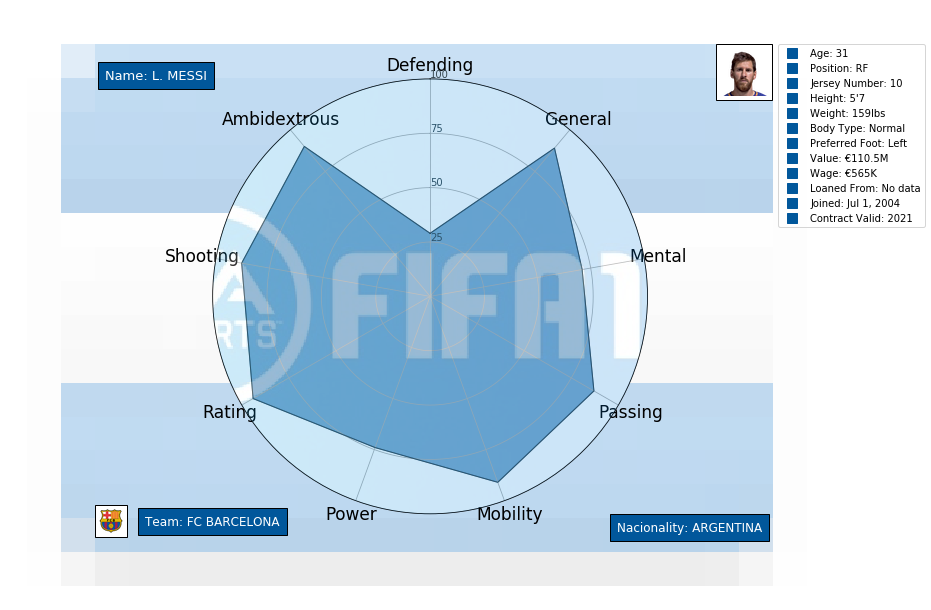

In [27]:
graphPolar(0)

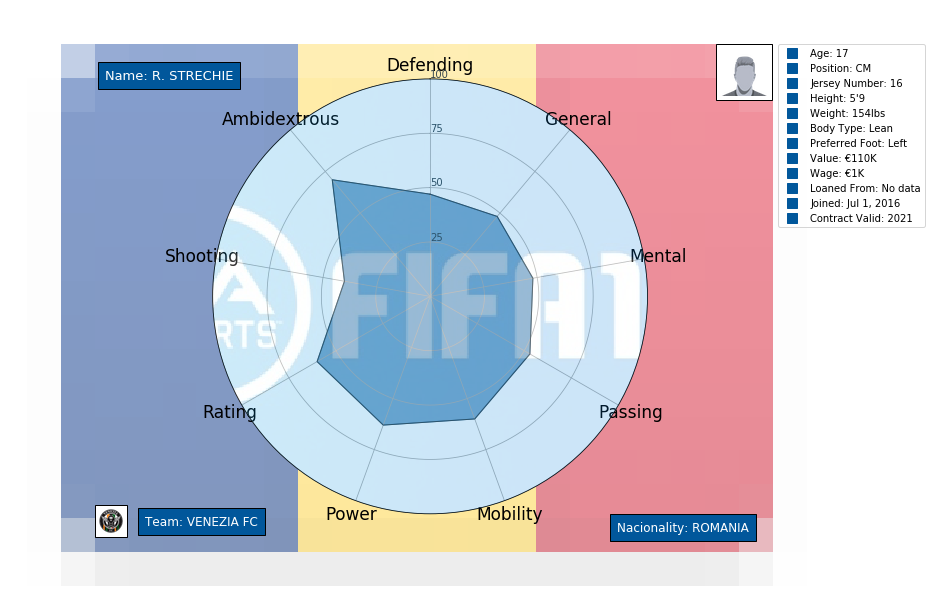

In [35]:
graphPolar(17035)

In [29]:
#for x in range(241, 250):
#    graphPolar(x)

In [30]:
#for x in range (0, 127):
 #   graphPolar(x)
    #graphPolar(177)
    #graphPolar(17035)

In [31]:
for x in range(17003, 17005):
    r = requests.get(data.Photo[x])
    if r.status_code == 404:
        print('Code Error 404 : ' + data.Name[x] + ' - ' + data.Photo[x])
    else:
        print('Code Success 200: ' + data.Name[x] + ' - ' + data.Photo[x])

Code Error 404 : J. Quiñones Saya - https://cdn.sofifa.org/players/4/19/243466.png
Code Success 200: K. Brouder - https://cdn.sofifa.org/players/4/19/228108.png


In [32]:
data.head()

,Name,Defending,General,Mental,Passing,Mobility,Power,Rating,Shooting,Ambidextrous,...,Value,Wage,Preferred_Foot,Body_Type,Jersey_Number,Joined,Loaned_From,Height,Weight,Contract_Valid
0,L. Messi,29,89,71,87,91,74,94,88,90,...,€110.5M,€565K,Left,Normal,10.0,"Jul 1, 2004",No data,5'7,159lbs,2021
1,Cristiano Ronaldo,27,88,73,81,91,83,94,88,90,...,€77M,€405K,Right,Normal,7.0,"Jul 10, 2018",No data,6'2,183lbs,2022
2,Neymar Jr,28,85,72,80,94,69,92,84,100,...,€118.5M,€290K,Right,Normal,10.0,"Aug 3, 2017",No data,5'9,150lbs,2022
3,De Gea,16,26,43,39,66,54,92,21,80,...,€72M,€260K,Right,Lean,1.0,"Jul 1, 2011",No data,6'4,168lbs,2020
4,K. De Bruyne,59,79,81,92,81,76,92,85,100,...,€102M,€355K,Right,Normal,7.0,"Aug 30, 2015",No data,5'11,154lbs,2023


In [33]:
players.Position[3]

'GK'